In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/content/customer_loan.csv')

In [4]:
data.head()

,applicantId,state,gender,age,race,marital_status,occupation,credit_score,income,debts,loan_type,loan_decision_type
0,004NZMX60E,CA,Male,36,No co-applicant,Married,NYPD,710,9371.333333,2000.00,Personal,Approved
1,004NZMX60E,CA,Male,36,No co-applicant,Married,NYPD,720,9371.333333,3013.82,Auto,Approved
2,017STAOLDV,OH,Female,34,White,Married,IT,720,9010.250000,1000.00,Credit,Approved
3,017WEFEN7S,OH,Male,48,No co-applicant,Married,Accout,670,6538.000000,2099.00,Home,Approved
4,01FSKXYCRD,FL,Male,32,White,Single,Business,720,8679.416667,1000.00,Home,Approved


In [5]:
data.isnull().sum().sum()

0

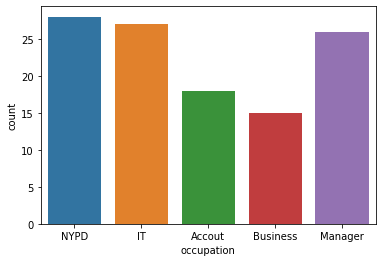

In [6]:
sns.countplot('occupation',data=data)
plt.show()

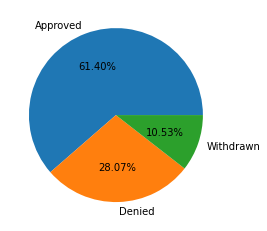

In [9]:
plt.pie(data['loan_decision_type'].value_counts(),labels=(data['loan_decision_type'].unique()),autopct='%0.2f%%')
plt.show()

In [11]:
data=data.drop('applicantId',axis=1)

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()

In [14]:
for i in data.columns:
  if data[i].dtypes=='object':
    data[i]=le.fit_transform(data[i])

In [16]:
data.head()

,state,gender,age,race,marital_status,occupation,credit_score,income,debts,loan_type,loan_decision_type
0,3,1,36,4,1,4,710,9371.333333,2000.00,3,0
1,3,1,36,4,1,4,720,9371.333333,3013.82,0,0
2,22,0,34,6,1,2,720,9010.250000,1000.00,1,0
3,22,1,48,4,1,0,670,6538.000000,2099.00,2,0
4,6,1,32,6,2,1,720,8679.416667,1000.00,2,0


In [17]:
X=data.drop('loan_decision_type',axis=1)

In [18]:
y=data['loan_decision_type']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(79, 10)
(35, 10)
(79,)
(35,)


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc=StandardScaler()

In [24]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [25]:
X_train

array([[ 1.0488614 ,  0.54321448, -0.49829009, -0.81258726,  1.01301514,
        -0.87049789, -0.10316939, -0.17109574, -0.47970235, -1.21340163],
       [-1.16073995,  0.54321448,  1.36309827, -1.25838166, -1.61086014,
         0.57727755,  1.19241152,  1.52325442,  0.97748691,  1.20320498],
       [ 1.14929782,  0.54321448,  0.67369518, -1.25838166,  1.01301514,
        -1.59438562,  0.13239078, -0.72838379,  0.39461121,  0.39766944],
       [ 1.35017067,  0.54321448,  1.43203858, -1.25838166, -0.2989225 ,
        -0.14661017,  0.66240115,  1.45401574,  1.2180164 ,  1.20320498],
       [-0.25681212, -1.8408935 ,  0.8115758 ,  0.97059034, -1.61086014,
        -1.59438562,  0.76840322, -0.684576  , -0.82942778, -1.21340163],
       [ 0.34580642,  0.54321448,  0.32899363,  0.97059034,  1.01301514,
        -1.59438562, -1.86987063, -0.84177268, -0.1882645 ,  1.20320498],
       [-0.5581214 ,  0.54321448,  1.15627734,  1.41638473, -1.61086014,
        -1.59438562,  0.13239078, -0.64531107

In [26]:
X_test

array([[ 0.34580642,  0.54321448, -1.39451411,  0.97059034, -0.2989225 ,
        -0.14661017, -0.96296399, -1.29224643, -0.88771535, -1.21340163],
       [-1.16073995,  0.54321448, -0.49829009,  1.41638473,  1.01301514,
        -0.87049789,  0.25017086, -0.17296767, -1.06257806,  0.39766944],
       [ 1.35017067, -1.8408935 , -0.22252885,  0.07900154, -1.61086014,
         0.57727755, -0.1149474 ,  0.29433063, -0.77114021, -0.4078661 ],
       [-0.25681212,  0.54321448, -0.77405132,  0.97059034,  1.01301514,
         1.30116527, -1.10430009, -0.44759389, -0.88771535,  0.39766944],
       [ 0.34580642,  0.54321448, -0.42934978,  0.52479594, -1.61086014,
         1.30116527,  0.25017086, -0.1211471 , -1.06257806,  0.39766944],
       [-1.06030352,  0.54321448, -1.25663349, -0.81258726,  1.01301514,
         1.30116527,  0.07350074, -1.08610555, -0.77114021,  1.20320498],
       [-0.85943067,  0.54321448, -0.49829009,  1.41638473, -1.61086014,
         1.30116527, -0.57428972, -0.15865424

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model1=LogisticRegression()

In [29]:
model1.fit(X_train,y_train)

LogisticRegression()

In [30]:
y_pred1=model1.predict(X_test)

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        19
           1       0.78      0.78      0.78         9
           2       0.00      0.00      0.00         7

    accuracy                           0.74        35
   macro avg       0.52      0.59      0.55        35
weighted avg       0.63      0.74      0.68        35



In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
model2=GaussianNB()

In [36]:
model2.fit(X_train,y_train)

GaussianNB()

In [37]:
y_pred2=model2.predict(X_test)

In [38]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84        19
           1       0.86      0.67      0.75         9
           2       0.50      0.14      0.22         7

    accuracy                           0.74        35
   macro avg       0.70      0.60      0.61        35
weighted avg       0.72      0.74      0.70        35



In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
model3=KNeighborsClassifier()

In [41]:
model3.fit(X_train,y_train)

KNeighborsClassifier()

In [42]:
y_pred3=model3.predict(X_test)

In [43]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.56      0.95      0.71        19
           1       0.33      0.11      0.17         9
           2       0.00      0.00      0.00         7

    accuracy                           0.54        35
   macro avg       0.30      0.35      0.29        35
weighted avg       0.39      0.54      0.43        35



In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
model4=DecisionTreeClassifier()

In [46]:
model4.fit(X_train,y_train)

DecisionTreeClassifier()

In [47]:
y_pred4=model4.predict(X_test)

In [48]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.67      0.95      0.78        19
           1       0.86      0.67      0.75         9
           2       0.00      0.00      0.00         7

    accuracy                           0.69        35
   macro avg       0.51      0.54      0.51        35
weighted avg       0.58      0.69      0.62        35



In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
model5=RandomForestClassifier()

In [51]:
model5.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
y_pred5=model5.predict(X_test)

In [53]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.64      0.95      0.77        19
           1       0.86      0.67      0.75         9
           2       0.00      0.00      0.00         7

    accuracy                           0.69        35
   macro avg       0.50      0.54      0.51        35
weighted avg       0.57      0.69      0.61        35

